<div style="background-color:#130654"><img src="https://pandas.pydata.org/static/img/pandas_white.svg" width=300></div>

Použití pro
+ analýzu dat
+ manipulaci s daty

Data jsou uložená v tzv. "DataFrame", pomocí kterého jsou uložena do přehledné podoby po sloupcích a řádcích.
<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg" width="350">
Data se mohou načítat a ukládat do nejrůznějších formátů.
![](https://pandas.pydata.org/docs/_images/02_io_readwrite.svg)


## Inicializace

Import knihoven:

In [1]:
import pandas as pd
import numpy as np
np.random.seed(1)

Pro znázornění v této práci využíváme soubor `hw_25000.csv` s údaji o výšce a váze náhodně vybraných lidí.

In [2]:
df=pd.read_csv("source/hw_25000.csv")
df

,Index,"""Height(Inches)""","""Weight(Pounds)"""
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


## Základní funkce

V této sekci budou ukázány některé základní funkce knihovny pandas. Funkcí je samozřejmě více a vše je možné dozvědět se např. z [oficiálních stránek knihovny pandas](https://pandas.pydata.org/).

Zjištění typů proměnných v jednotlivých sloupcích:

In [3]:
df.dtypes

Index                  int64
 "Height(Inches)"    float64
 "Weight(Pounds)"    float64
dtype: object

Výpis prvních $3$ řádků tabulky:

In [4]:
df.head(3)

,Index,"""Height(Inches)""","""Weight(Pounds)"""
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269


Výpis všech sloupců tabulky:

In [5]:
df.columns

Index(['Index', ' "Height(Inches)"', ' "Weight(Pounds)"'], dtype='object')

V prostředí pandas je výhodnější, pokud jsou sloupce pojmenovány bez použití speciálních znaků, protože jsou potom ekvivalentní výrazy `df["sloupec"]` a `df.sloupec`, což je pro zápis mnohem přehlednější.

In [6]:
df.rename(columns={
    ' "Height(Inches)"': 'Height',
    ' "Weight(Pounds)"': 'Weight'
    }, inplace=True)
df.head(3)

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269


Pokud například potřebujeme převést jednotky do metrické soustavy, je možno použít funkci `pandas.DataFrame.apply`.

In [7]:
df.Height=df.Height.apply(lambda x:x*2.54)
df.Weight=df.Weight*0.4535924
df.head(3)

,Index,Height,Weight
0,1,167.089607,51.252539
1,2,181.648633,61.909602
2,3,176.272800,69.411839


## Výběr dat
Někdy je také potřeba z tabulky vybrat pouze některé informace, například předem vybrané řádky:

In [8]:
df[5:8]

,Index,Height,Weight
5,6,174.492514,55.929032
6,7,177.297182,64.180921
7,8,177.837389,61.898262


Dále je možné využívat některé funkce knihovny `pandas`. Některé příklady použití funkce `pandas.DataFrame.loc`:

In [9]:
df.loc[17:19,"Height"]

17    174.369146
18    180.925038
19    170.513197
Name: Height, dtype: float64

In [10]:
df.loc[17:19,["Weight","Height"]]

,Weight,Height
17,64.851602,174.369146
18,62.551526,180.925038
19,56.265824,170.513197


In [11]:
df.loc[[7,4,15],["Weight","Height"]]

,Weight,Height
7,61.898262,177.837389
4,65.452068,172.181037
15,63.501802,180.572664


Pandas dělá indexování sám o sobě, soupec `Index` tedy můžeme odstranit:

In [12]:
df=df.loc[:,["Height","Weight"]]
df.head(3)

,Height,Weight
0,167.089607,51.252539
1,181.648633,61.909602
2,176.272800,69.411839


A dále pak `pandas.DataFrame.iloc`, který pouze místo názvů sloupců bere jejich indexy a `pandas.DataFrame.iat`, který umožňuje vytáhnutí pouze skalárních dat z tabulky, ale zato je podstatně rychlejší:

In [13]:
df.iloc[[4,3,5],[1,0]]

,Weight,Height
4,65.452068,172.181037
3,64.562256,173.270164
5,55.929032,174.492514


In [14]:
df.iat[4,1]

65.45206790204

## Matematiké operace
Pokud je potřeba analyzovat tuto funkci, je možno využít např. funkci `pandas.DataFrame.describe`, která z dat spočítá některé statistické informace.

In [15]:
df.describe()

,Height,Weight
count,25000.000000,25000.000000
mean,172.702509,57.642260
std,4.830264,5.289295
min,153.107034,35.386902
25%,169.429170,54.117508
50%,172.709078,57.677789
75%,175.953312,61.186372
max,190.888112,77.529827


Tabulka se dá také převést do podoby `numpy.array` a dále provádět všechny operace, které nabízí tato knihovna:

In [16]:
df.to_numpy()

array([[167.0896074 ,  51.25253926],
       [181.6486334 ,  61.90960198],
       [176.2727996 ,  69.41183884],
       ...,
       [164.334317  ,  53.64433198],
       [171.5241172 ,  59.99585028],
       [174.9491294 ,  56.64198808]])

## Řazení

V několika případech se vyplatí tabulku transponovat funkcí `pandas.DataFrame.T`:

In [17]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
Height,167.089607,181.648633,176.272800,173.270164,172.181037,174.492514,177.297182,177.837389,172.472731,169.627194,...,177.743282,182.668062,180.243937,168.134335,170.716600,176.535461,163.952580,164.334317,171.524117,174.949129
Weight,51.252539,61.909602,69.411839,64.562256,65.452068,55.929032,64.180921,61.898262,50.971221,54.733725,...,56.865609,58.188647,66.312306,53.885598,57.905742,53.538055,54.518722,53.644332,59.995850,56.641988


Nebo také celou tabulku seřadit podle hodnot nějakého sloupce funkcí `pandas.DataFrame.sort_values`:

In [18]:
df=df.sort_values(by="Weight", ascending=True)
df

,Height,Weight
22945,157.293031,35.386902
14106,157.244415,35.637780
24610,169.082822,37.368294
727,160.338770,37.686847
15005,166.299210,37.801751
...,...,...
367,183.705221,76.307396
4343,186.744127,76.603138
7996,176.716157,76.714631
17079,188.711078,77.359231


Případně vše zpět seřadit podle indexů funkcí `pandas.DataFrame.sort_index`:

In [19]:
df=df.sort_index(axis=0, ascending=True)
df.head(3)

,Height,Weight
0,167.089607,51.252539
1,181.648633,61.909602
2,176.272800,69.411839


## Podmínky kladené na data

Často se stává, že jsou potřeba jen data, která splňují určitou podmínku. 

In [20]:
df[df['Height'] > 70].head(3)

,Height,Weight
0,167.089607,51.252539
1,181.648633,61.909602
2,176.272800,69.411839


Dalším příkladem může být vytvoření sloupce s labelama, které vzniknou z aplikování nějaké podmínky.

In [21]:
df["Label"]=[("Very high" if i>180 else "Not that high") for i in df.Height]
df.head(4)

,Height,Weight,Label
0,167.089607,51.252539,Not that high
1,181.648633,61.909602,Very high
2,176.272800,69.411839,Not that high
3,173.270164,64.562256,Not that high


Pro další účely vytvořme spoupec integerů hmotností:

In [22]:
df["Cathegory"]=np.random.randint(0,5,size=25000)
df.head(3)

,Height,Weight,Label,Cathegory
0,167.089607,51.252539,Not that high,3
1,181.648633,61.909602,Very high,4
2,176.272800,69.411839,Not that high,0


Nyní budou vybrány řádky pouze u lidí z kategorií 2 a 4 za použití funkce `pandas.DataFrame.isin`:

In [23]:
df[df.Cathegory.isin([2,4])].head(5)

,Height,Weight,Label,Cathegory
1,181.648633,61.909602,Very high,4
8,172.472731,50.971221,Not that high,4
9,169.627194,54.733725,Not that high,4
11,171.763258,51.774397,Not that high,2
12,173.488299,56.976059,Not that high,4


Pokud je třeba aplikovat na data nějakou složitou podmínku, je možné využít i funkci `pandas.DataFrame.query`:

In [24]:
df.query("Cathegory in [1,3] & Weight<45 & (Height>173 | Height<159)").head(4)

,Height,Weight,Label,Cathegory
7439,173.537118,44.991136,Not that high,3
8607,173.821141,44.374981,Not that high,1
10240,157.306061,38.687077,Not that high,3
11485,173.952433,41.068233,Not that high,3


## Kategorizace

Někdy se může hodit vědět, kolik položek je obsaženo v jednotlivých kategoriích. K tomu se může přistupovat několika způsoby, např. pomocí `pandas.Series.value_counts` nebo `pandas.DataFrame.groupby` s aplikováním funkce `apply`.

In [25]:
df.Cathegory.value_counts()

0    5085
2    5061
3    5029
1    4954
4    4871
Name: Cathegory, dtype: int64

In [26]:
df.groupby("Cathegory").apply(len)

Cathegory
0    5085
1    4954
2    5061
3    5029
4    4871
dtype: int64

Pro další příklady zaveďme nový `DataFrame` s názvem `df1`.

In [27]:
df1 = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
df1.head(3)

,A,B,C,D
0,foo,one,-1.198895,-0.539164
1,bar,one,-2.257519,0.675937
2,foo,two,-0.155694,1.225300


### Aplikování funkcí na data vybraných kategorií

Sčítání všech hodnot podle jednotlivých kategorií pomocí funkce `pandas.core.groupby.GroupBy.sum`:

In [28]:
df1.groupby("A").sum()

,C,D
A,,
bar,-3.441341,-0.156947
foo,-5.230158,1.130484


To samé se dá provádět i podle více tříd současně.

In [29]:
df1.groupby(["A","B"]).sum()

C         D
A   B                        
bar one   -2.257519  0.675937
    three -1.070431  0.940944
    two   -0.113391 -1.773828
foo one   -2.119308  0.680423
    three -1.859372 -0.947707
    two   -1.251478  1.397767

Na pouhý počet hodnot se pak může použít funkce `pandas.core.groupby.GroupBy.count`, která do počtů nezahrnuje chybějící informace.

In [30]:
df1.groupby(["A","B"]).count()

C  D
A   B          
bar one    1  1
    three  1  1
    two    1  1
foo one    2  2
    three  1  1
    two    2  2

Pokud je však potřeba zjistit počet řádků v jednotlivých kategoriích nezávisle na tom, jestli dané hodnoty existují, je třeba použít funkci `pandas.core.groupby.GroupBy.size`.

In [31]:
df1.groupby("A").size()

A
bar    3
foo    5
dtype: int64

## Vizualizace dat

V knihovně `pandas` je možné vizualizovat data jednotlivých sloupců. K tomu je ale nejprve potřeba importovat knihovnu `matplotlib`.

In [32]:
import matplotlib.pyplot as plt
plt.close('all')

Nyní se data mohou jednodušše vizualizovat. Pokud není ve funkci `plot` nic specifikováno, do osy $x$ se berou hodnoty indexu jednotlivých řádků a na osu $y$ hodnoty jednotlivých sloupců. 

<AxesSubplot:xlabel='C'>

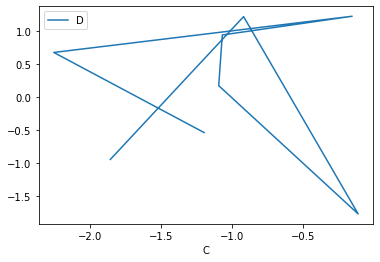

In [33]:
df1.plot(x="C",y="D")

Data byla vygenerována zcela náhodně, a proto hodnoty sloupce `"C"` nejsou seřazeny podle velikosti. To se však dá jednodušše napravit.

<AxesSubplot:xlabel='C'>

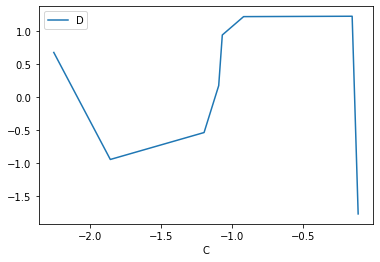

In [34]:
df1.sort_values(by="C").plot(x="C",y="D")

Využití se můžedemostrovat i na jiných příkladech, třeba na souboru `c.csv` s hodnotami naměřeného signálu.

In [35]:
df2=pd.read_csv('source/stream.csv')
df2.head(3)

,Amp
0,-0.003816
1,-0.001397
2,0.000973


<AxesSubplot:>

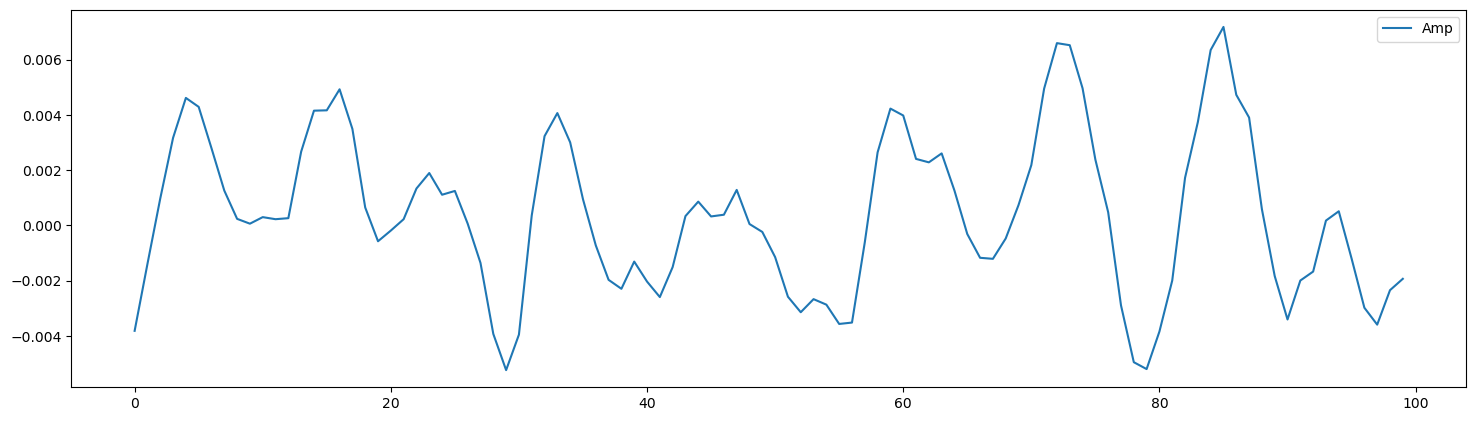

In [36]:
plt.rcParams["figure.dpi"] = 100
df2[:100].plot(figsize=(18,5))